<a href="https://colab.research.google.com/github/Yuhan119/DA/blob/main/Programming.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re
from google.colab import files

In [ ]:
# After uploading all .csv files, use the following code to read the data
ks4 = pd.read_csv("england_ks4revised.csv", low_memory=False)
census = pd.read_csv("england_census.csv")
pupdest = pd.read_csv("england_ks4-pupdest.csv")
schoolinfo = pd.read_csv("england_school_information.csv")

In [ ]:
# Convert URN columns to strings in all data sets
for df in [ks4, census, pupdest, schoolinfo]:
  df['URN'] = df['URN'].astype(str).str.strip()

In [ ]:
# Merge master data table (by URN)
df = ks4.merge(census, on="URN", how="left", suffixes=("", "_census"))
df = df.merge(pupdest, on="URN", how="left", suffixes=("", "_dest"))
df = df.merge(schoolinfo, on="URN", how="left", suffixes=("", "_info"))

In [ ]:
# View the merge results
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29114 entries, 0 to 29113
Columns: 555 entries, RECTYPE to ADMPOL_info
dtypes: float64(35), int64(2), object(518)
memory usage: 123.3+ MB


In [ ]:
df.describe(include='all')

,RECTYPE,LEA,ESTAB,URN,SCHNAME,SCHNAME_AC,ADDRESS1,ADDRESS2,ADDRESS3,TOWN,...,MINORGROUP,SCHOOLTYPE_info,ISPRIMARY,ISSECONDARY,ISPOST16,AGELOW,AGEHIGH,GENDER,RELCHAR,ADMPOL_info
count,29114.000000,28812.000000,5709.000000,29114,5709,59,5681,2709,692,5401,...,0,0,0.0,0.0,0.0,0.0,0.0,0,0,0
unique,NaN,NaN,NaN,5710,5516,59,4685,2043,519,1050,...,0,0,NaN,NaN,NaN,NaN,NaN,0,0,0
top,NaN,NaN,NaN,nan,The King's School,Cardinal Pole Catholic School,Station Road,London,London,London,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,23405,7,1,38,21,16,447,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,3.481143,629.214702,5305.591347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.142000,278.767006,1167.262711,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,201.000000,1101.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4.000000,336.000000,4050.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,4.000000,812.000000,5405.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4.000000,879.000000,6072.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.head()

,RECTYPE,LEA,ESTAB,URN,SCHNAME,SCHNAME_AC,ADDRESS1,ADDRESS2,ADDRESS3,TOWN,...,MINORGROUP,SCHOOLTYPE_info,ISPRIMARY,ISSECONDARY,ISPOST16,AGELOW,AGEHIGH,GENDER,RELCHAR,ADMPOL_info
0,1,201.0,6007.0,100003.0,City of London School,NaN,107 Queen Victoria Street,NaN,NaN,London,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,201.0,6005.0,100001.0,City of London School for Girls,NaN,St Giles' Terrace,Barbican,NaN,London,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,201.0,6000.0,100544.0,David Game College,NaN,31 Jewry Street,London,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,201.0,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,201.0,NaN,nan,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Remove rows/columns with missing data as required
df = df.dropna(thresh=len(df) * 0.67, axis=1)
df = df.dropna(thresh=df.shape[1] * 0.67, axis=0)
df.isnull().sum()

,0
RECTYPE,0
LEA,151
URN,0
ICLOSE,0
TOTPUPS,0
...,...
OVERALL_DESTPER_21,2097
COHORT_DIS_21,2097
OVERALL_DESTPER_DIS_21,2097
COHORT_NONDIS_21,2097


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28693 entries, 0 to 29113
Columns: 445 entries, RECTYPE to OVERALL_DESTPER_NONDIS_21
dtypes: float64(9), int64(2), object(434)
memory usage: 97.6+ MB


In [ ]:
# Candidate "Special coding" column: low cardinality + column name keyword
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
# Threshold: unique value < 50 or < 5% sample size
threshold = 50
frac = 0.05
low_card = [c for c in num_cols
            if df[c].nunique() < threshold
            or df[c].nunique() < len(df) * frac]

keywords = ['code','id','urn','la','postcode','lsoa']
by_name = [c for c in df.columns
           if any(re.search(kw, c, re.IGNORECASE) for kw in keywords)]

special_cols = list(set(low_card + by_name))
print("Detected code/ID column：", special_cols)

Detected code/ID column： ['P8MEAOPEN_FSM6CLA1A', 'PTEBACC_95_NFSM6CLA1A', 'P8MEAENG_CILOW_FSM6CLA1A', 'TNOTFSM6CLA1A', 'P8CIUPP_NFSM6CLA1A', 'P8CIUPP_MID_ORIG', 'P8MEA_NFSM6CLA1A_ORIG', 'PTEBACC_94_NFSM6CLA1A', 'P8MEAMAT_CILOW_NFSM6CLA1A', 'COHORT_22', 'P8CIUPP_MID', 'P8MEAEBAC_NFSM6CLA1A', 'P8CILOW_NFSM6CLA1A', 'P8CILOW_MID', 'P8MEAENG_CIUPP_NFSM6CLA1A', 'P8CILOW_FSM6CLA1A', 'URN', 'ATT8SCR_MID', 'LANVAMEA_NFSM6CLA1A_PTQ_EE', 'PTEBACC_94_FSM6CLA1A', 'P8MEAOPEN_CIUPP_NFSM6CLA1A', 'HUMVAMEA_FSM6CLA1A_PTQ_EE', 'PTOTENT_E_COVID_IMPACTED_PTQ_EE', 'P8MEAMAT_CIUPP_NFSM6CLA1A', 'TAVENT_GNFSM6CLA1A_PTQ_EE', 'PTEBACLAN_94', 'TP8ADJ_FSM6CLA1A', 'P8CIUPP_FSM6CLA1A_ORIG', 'TAVENT_E_3NG_NFSM6CLA1A_PTQ_EE', 'ATT8SCR_FSM6CLA1A', 'P8CILOW_MID_ORIG', 'P8MEA_FSM6CLA1A', 'LANVAMEA_HI_PTQ_EE', 'P8MEAMAT_FSM6CLA1A', 'SEN_ALL4', 'ATT8SCRMAT_NFSM6CLA1A', 'TAVENT_E_3NG_MID_PTQ_EE', 'P8MEAMAT_CILOW_FSM6CLA1A', 'ATT8SCR_NFSM6CLA1A', 'PTEBACLAN_95', 'TTOTENT_E_COVID_IMPACTED_PTQ_EE', 'P8MEAOPEN_CILOW_FSM6CLA1A',

In [ ]:
# Turn these columns into categories and fill in the missing columns with 'Unknown'
for c in special_cols:
    # Convert non-numeric values to NaN using pd.to_numeric
    df[c] = pd.to_numeric(df[c], errors='coerce')
    df[c] = df[c].fillna('Unknown').astype('category')

In [ ]:
# True numerical feature padding (excluding special_cols)
numeric_feats = [c for c in df.select_dtypes(include=[np.number]).columns
                 if c not in special_cols]
for c in numeric_feats:
    df[c].fillna(df[c].mean(), inplace=True)

In [ ]:
obj_cols = df.select_dtypes(include=['object']).columns.tolist()
print(obj_cols)

['TOTPUPS', 'NUMBOYS', 'NUMGIRLS', 'BPUP', 'PBPUP', 'GPUP', 'PGPUP', 'KS2ASS', 'TPRIORLO', 'PTPRIORLO', 'TPRIORAV', 'PTPRIORAV', 'TPRIORHI', 'PTPRIORHI', 'TEALGRP2', 'PTEALGRP2', 'TEALGRP1', 'PTEALGRP1', 'TEALGRP3', 'PTEALGRP3', 'TNMOB', 'PTNMOB', 'PSENE4', 'PSEN_ALL4', 'PSENK4', 'TOTATT8', 'ATT8SCR', 'TOTATT8ENG', 'ATT8SCRENG', 'TOTATT8MAT', 'ATT8SCRMAT', 'TOTATT8EBAC', 'ATT8SCREBAC', 'TOTATT8OPEN', 'ATT8SCROPEN', 'TOTATT8OPENG', 'ATT8SCROPENG', 'TOTATT8OPENNG', 'ATT8SCROPENNG', 'AVGEBACFILL', 'AVGOPENFILL', 'P8PUP', 'TP8ADJ', 'P8MEACOV', 'P8MEA', 'P8CILOW', 'P8CIUPP', 'P8MEA_ORIG', 'P8CILOW_ORIG', 'P8CIUPP_ORIG', 'P8MEAENG', 'P8MEAENG_CILOW', 'P8MEAENG_CIUPP', 'P8MEAMAT', 'P8MEAMAT_CILOW', 'P8MEAMAT_CIUPP', 'P8MEAEBAC', 'P8MEAEBAC_CILOW', 'P8MEAEBAC_CIUPP', 'P8MEAOPEN', 'P8MEAOPEN_CILOW', 'P8MEAOPEN_CIUPP', 'PTL2BASICS_94', 'PTL2BASICS_95', 'TOTEBACCAPS', 'EBACCAPS', 'EBACCAPS_LO', 'EBACCAPS_HI', 'EBACCAPS_EAL', 'EBACCAPS_GIRLS', 'EBACCAPS_BOYS', 'EBACCAPS_NMOB', 'TEBACC_E_PTQ_EE', '

In [ ]:
# Fill in the remaining category features (excluding special_cols)
cat_feats = [c for c in df.select_dtypes(include=['object','category']).columns
             if c not in special_cols]
for c in cat_feats:
    df[c].fillna(df[c].mode()[0], inplace=True)

<ipython-input-96-2347cd614ce8>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].mode()[0], inplace=True)


In [ ]:
# Step 1: 替换异常值为 NaN
df = df.replace(['Unknown', 'NA', ''], np.nan)

# Step 2: 处理分类数据
# 自动检测 object 类型列和分类列
categorical_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=categorical_cols, dummy_na=True)

# Step 3: 转换混合列为数值
# 尝试将所有列转换为数值类型，无法转换的保留为 NaN
df = df.apply(pd.to_numeric, errors='coerce')
print(df)

In [ ]:
# Validation
df.isnull().sum()

,0
RECTYPE,0
LEA,0
URN,0
ICLOSE,0
TOTPUPS,0
...,...
OVERALL_DESTPER_21,0
COHORT_DIS_21,0
OVERALL_DESTPER_DIS_21,0
COHORT_NONDIS_21,0


<ipython-input-16-f45f8619adb7>:7: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['high_risk'] = (df['P8MEA'] < 0).astype(int)


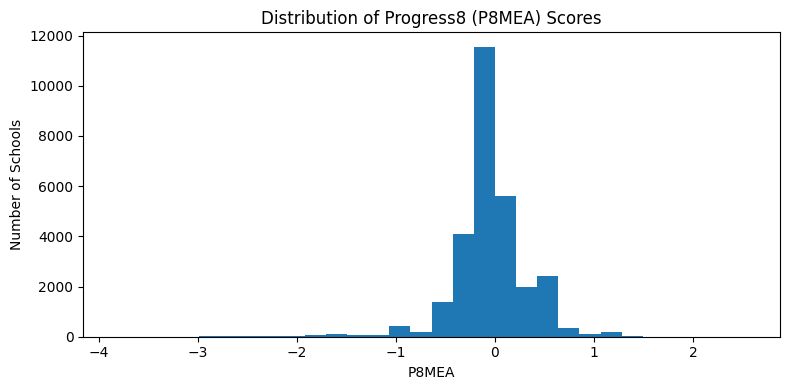

In [ ]:
# EDA
# Choose Progress 8 as the core target variable and Attainment 8 as one of the important characteristics in the model. Here's why:
# 1. Progress 8 is an "incremental" indicator that better reflects the actual contribution of a school to its students.
# 2. Attainment 8 is an absolute performance indicator, which is susceptible to the influence of student origin differences.

# 1. Create the binary target using P8MEA
df['high_risk'] = (df['P8MEA'] < 0).astype(int)

# 2. Continuous‐score EDA:
# Histogram of P8MEA
plt.figure(figsize=(8,4))
plt.hist(df['P8MEA'], bins=30)
plt.title('Distribution of Progress8 (P8MEA) Scores')
plt.xlabel('P8MEA')
plt.ylabel('Number of Schools')
plt.tight_layout()
plt.show()

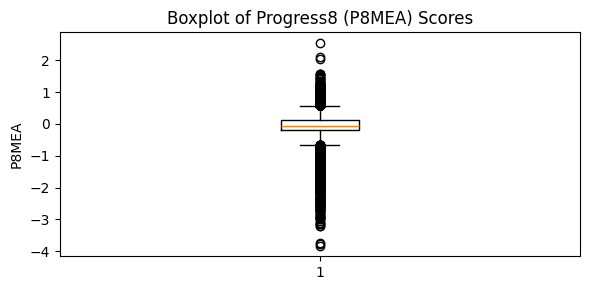

In [ ]:
# Boxplot of P8MEA
plt.figure(figsize=(6,3))
plt.boxplot(df['P8MEA'], vert=True)
plt.title('Boxplot of Progress8 (P8MEA) Scores')
plt.ylabel('P8MEA')
plt.tight_layout()
plt.show()

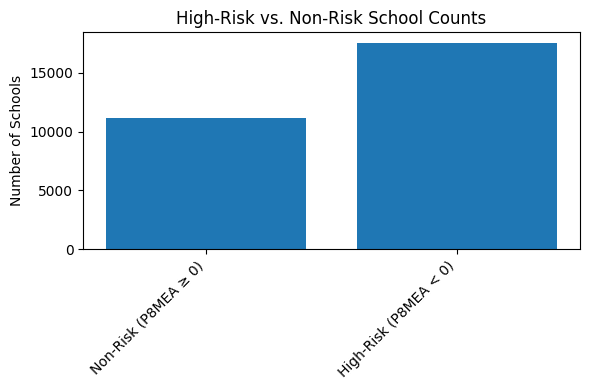

In [ ]:
# 3. Binary‐label EDA: bar chart of high_risk counts
counts = df['high_risk'].value_counts().sort_index()
labels = ['Non‑Risk (P8MEA ≥ 0)', 'High‑Risk (P8MEA < 0)']

plt.figure(figsize=(6,4))
plt.bar(labels, counts)
plt.title('High‑Risk vs. Non‑Risk School Counts')
plt.ylabel('Number of Schools')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Calculate descriptive statistics
desc = df['P8MEA'].describe()
print(desc)
print('skewness:', df['P8MEA'].skew())
print('kurtosis:', df['P8MEA'].kurt())

count    28693.000000
mean        -0.049373
std          0.378935
min         -3.840000
25%         -0.200000
50%         -0.049373
75%          0.110000
max          2.560000
Name: P8MEA, dtype: float64
skewness: -1.4078088432849805
kurtosis: 9.777184851393116


In [ ]:
# Detecting Outliers
Q1 = df['P8MEA'].quantile(0.25)
Q3 = df['P8MEA'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Winsorization
df['P8MEA_clipped'] = df['P8MEA'].clip(lower=lower_bound, upper=upper_bound)

<ipython-input-20-2387e58a98c1>:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['P8MEA_clipped'] = df['P8MEA'].clip(lower=lower_bound, upper=upper_bound)


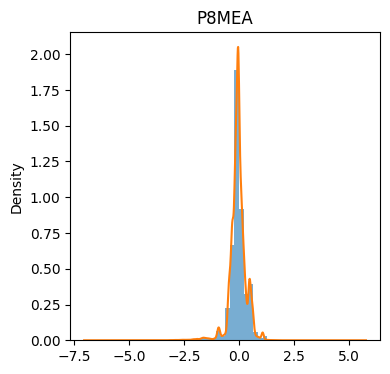

In [ ]:
# Visual distribution comparison. After deleting or censoring, draw the distribution/box plot again to see the effect
plt.figure(figsize=(4,4))
plt.hist(df['P8MEA'], bins=30, density=True, alpha=0.6)
df['P8MEA'].plot(kind='kde')
plt.title('P8MEA')
plt.show()

In [ ]:
# 对分类列进行 One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Feature1', 'Feature2'], dummy_na=True)

KeyError: "None of [Index(['Feature1', 'Feature2'], dtype='object')] are in the [columns]"

In [ ]:
# Correlation between P8MEA and other key variables
corrs = df.corr()['P8MEA'].sort_values(ascending=False)
print(corrs.head(10))   # The top 10 characteristics with the strongest positive correlations
print(corrs.tail(10))   # The top 10 characteristics with the strongest negative correlations

ValueError: could not convert string to float: 'Unknown'